## Informasi Mahasiswa

Nama: Muhammad Kemal Fasya

NPM : 2108107010052

## Jenis Dataset

Dataset dari kaggle https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification/data


informasi variabel

* id: ID
* battery_power: Total energy a battery can store in one time measured in mAh
* blue: Has bluetooth or not
* clock_speed: speed at which microprocessor executes instructions
* dual_sim: Has dual sim support or not
* fc: Front Camera mega pixels
* four_g: Has 4G or not
* int_memory: Internal Memory in Gigabytes
* m_dep: Mobile Depth in cm
* mobile_wt: Weight of mobile phone
* n_cores: Number of cores of processor
* pc: Primary Camera mega pixels
* px_height: Pixel Resolution Height
* px_width: Pixel Resolution Width
* ram: Random Access Memory in Megabytes
* sc_h: Screen Height of mobile in cm
* sc_w: Screen Width of mobile in cm
* talk_time: longest time that a single battery charge will last when you are
* three_g: Has 3G or not
* touch_screen: Has touch screen or not
* wifi: Has wifi or not


## Import libraries

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#hist = hist.history
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler, OneHotEncoder

## Reading dataset

In [14]:
train=pd.read_csv('dataset/klasifikasi/train.csv')
test=pd.read_csv('dataset/klasifikasi/test.csv')


## Data Review

In [15]:
train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [17]:
train.shape

(2000, 21)

In [18]:
train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [19]:
train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


<Axes: >

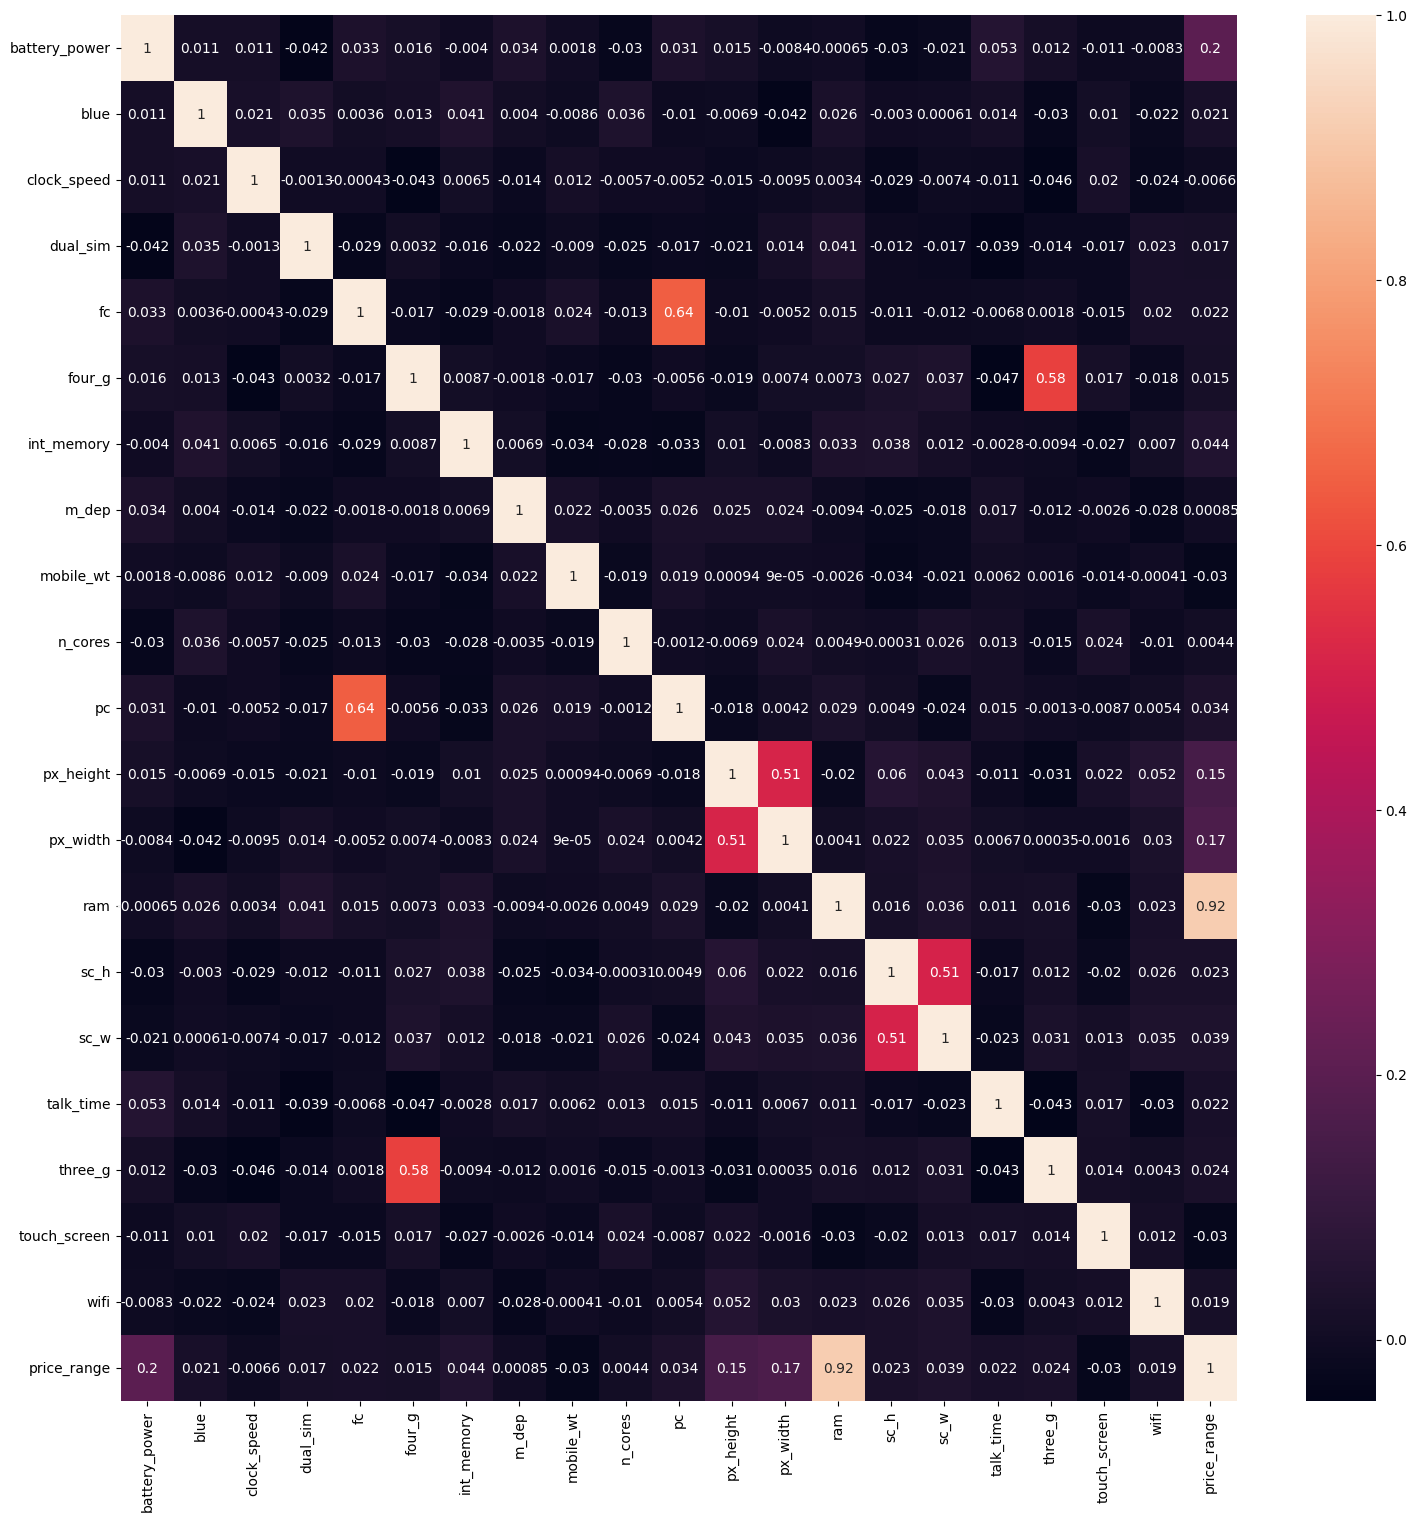

In [20]:
plt.subplots(figsize = (18, 18))
sns.heatmap(train.corr(), annot = True)

In [21]:
train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [22]:
correlated_features = set()
correlation_matrix = train.corr()

In [23]:
corr_cols_order = train.corr()['price_range'].sort_values(ascending=False).index
corr_cols_order

Index(['price_range', 'ram', 'battery_power', 'px_width', 'px_height',
       'int_memory', 'sc_w', 'pc', 'three_g', 'sc_h', 'fc', 'talk_time',
       'blue', 'wifi', 'dual_sim', 'four_g', 'n_cores', 'm_dep', 'clock_speed',
       'mobile_wt', 'touch_screen'],
      dtype='object')

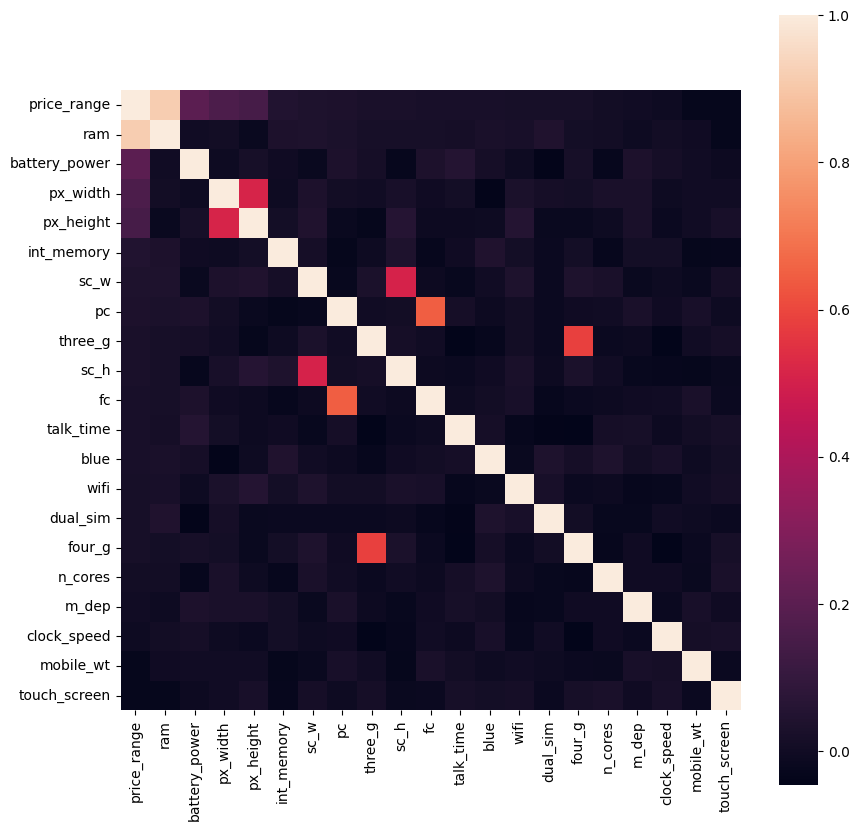

In [24]:
plt.figure(figsize=(10, 10))
sns.heatmap(train[corr_cols_order].corr(), square=True)
plt.show()

In [25]:
train.duplicated().sum()

0

## EDA

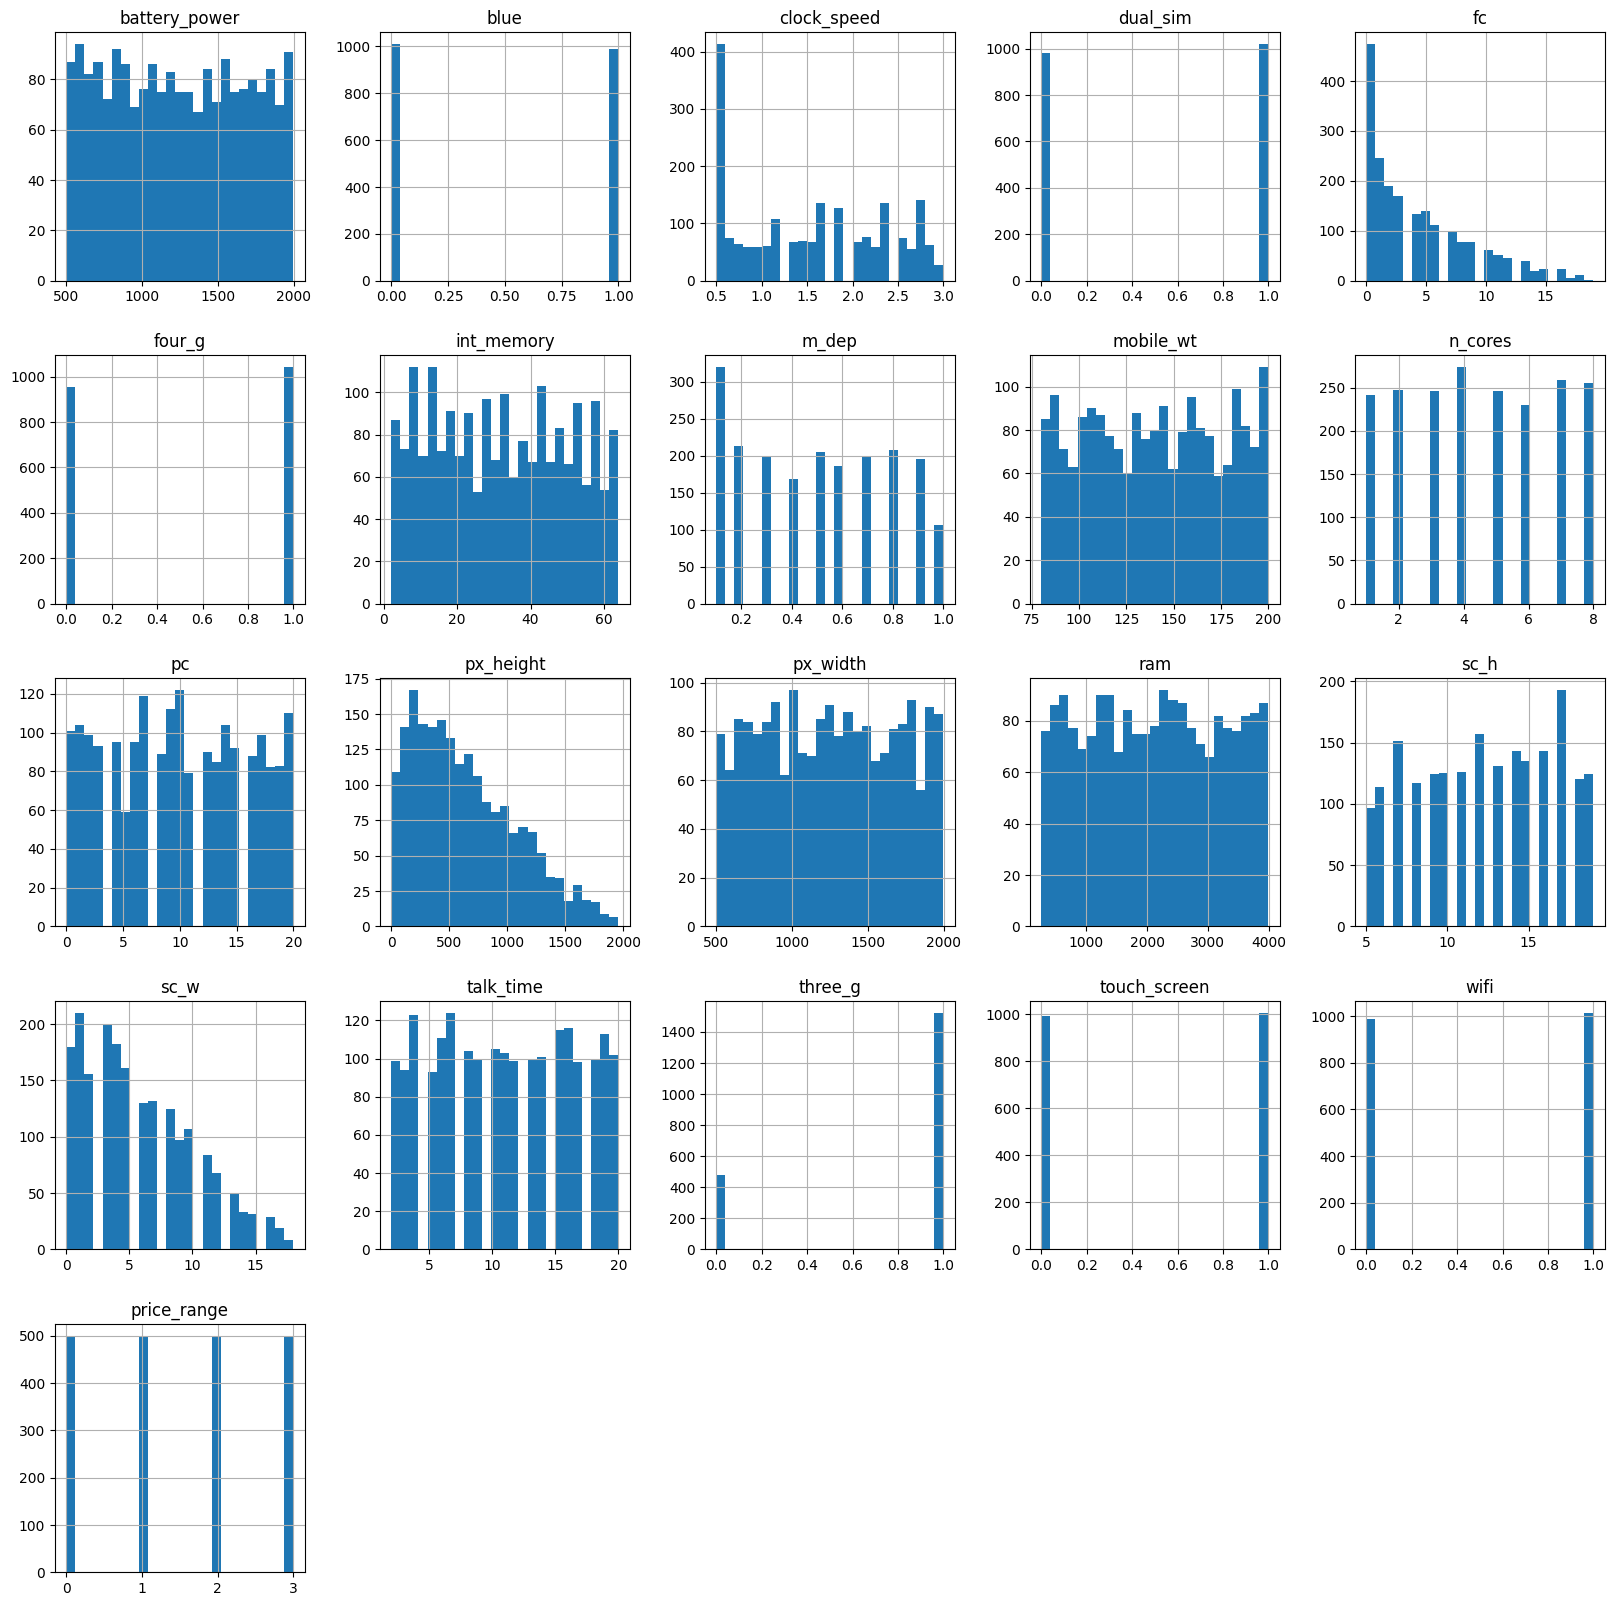

In [26]:
train.hist(bins=25,figsize=(20,20));

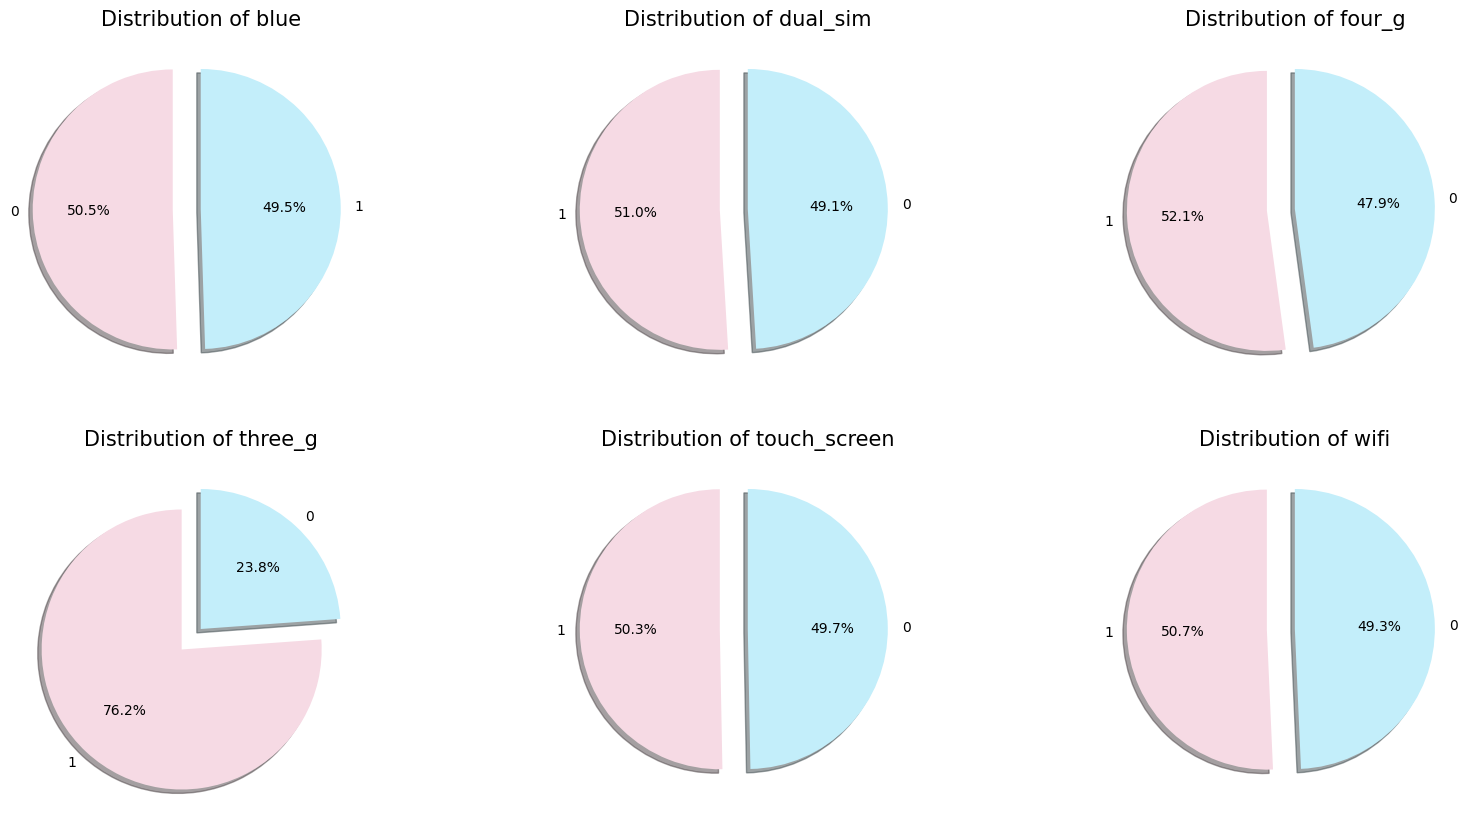

In [27]:
features = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

plt.figure(figsize=(20,10))
count = 0

for i in features:
    myexplode = [0.2, 0]
    
    colors = ['#f6dae4','#c3eefa']
    
    labels = train[i].value_counts().index
    sizes = train[i].value_counts().values  
    
    plt.subplot(2,3,count+1)
    plt.pie(sizes, labels=labels, explode = myexplode, shadow = True, startangle=90, colors=colors, autopct='%1.1f%%')
    plt.title(f'Distribution of {features[count]}', color = 'black',fontsize = 15)
    count += 1

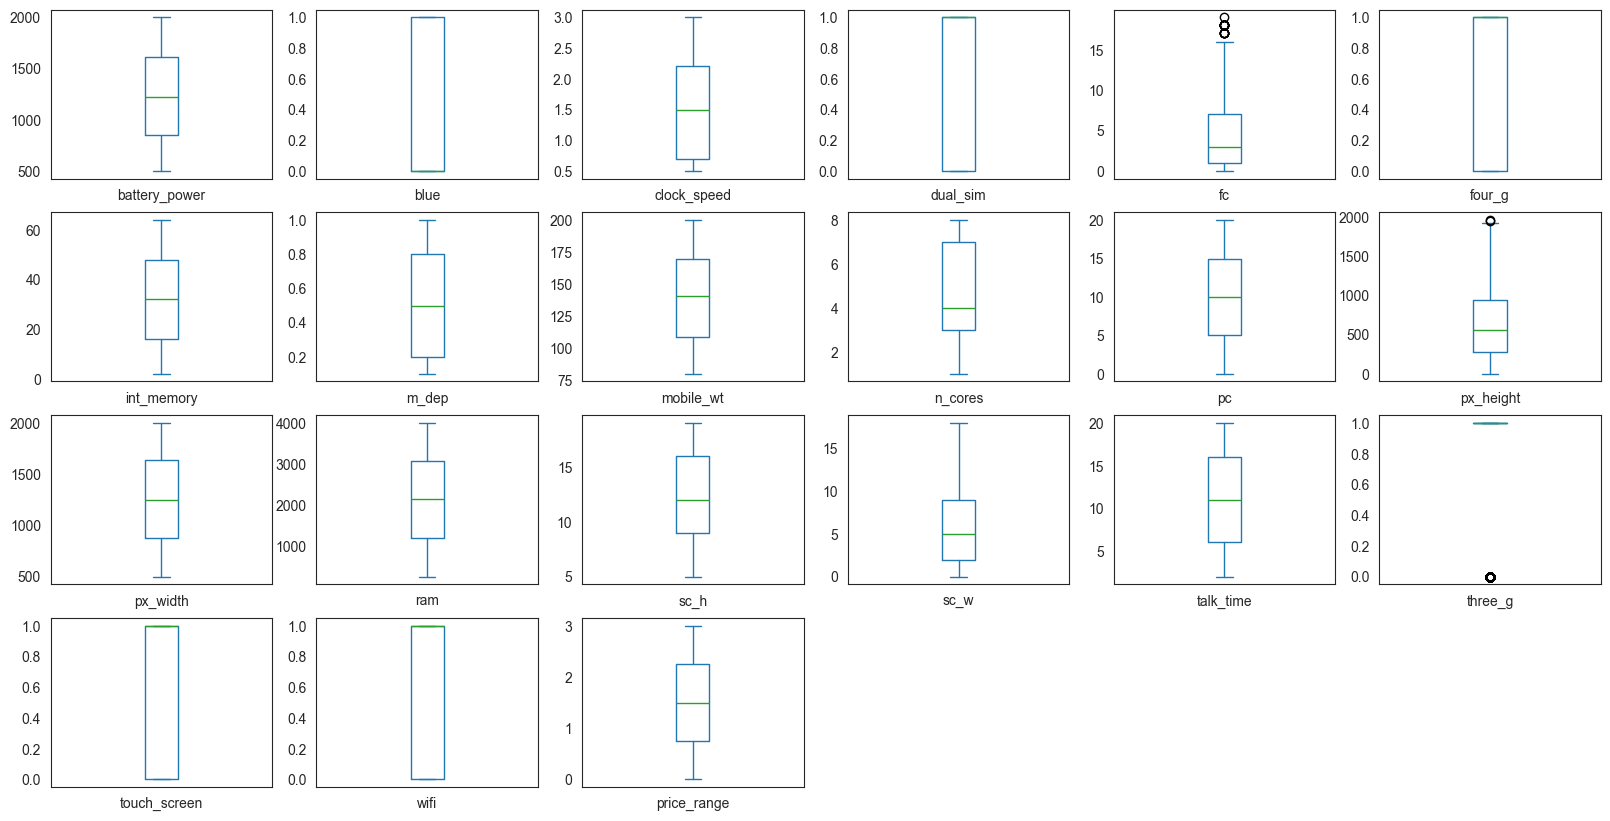

In [30]:
train.plot(kind = "box" , subplots = True , layout= (7,6), figsize =(20,18) )
plt.show()

for i in train.columns:
    if train[i].dtype=='object':
            label_encoder=LabelEncoder()
            train[i]=label_encoder.fit_transform(train[i])

In [31]:
# convert to numpy arrays and split features from labels
x = train.drop('price_range', axis=1).values
x_predict = test.drop('id', axis=1).values
y =train['price_range'].values

In [32]:
# Scale the data using StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x_predict = sc.fit_transform(x_predict)

In [33]:
# OneHot Encoding for labels  
ohe = OneHotEncoder()
y= ohe.fit_transform(y.reshape(-1, 1)).toarray()

In [34]:
# Split the data into train and test datasets with ratio 9:1
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

## Using Artificial Neural Network

In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.optimizers import Adam

In [36]:
L1L2_model = tf.keras.models.Sequential([
    Dense(64, input_dim=20, activation='relu', kernel_regularizer=tf.keras.regularizers.L1L2(0.01)),
    Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.L1L2(0.01)),
    Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.L1L2(0.01)),
    Dense(4, activation='softmax')
])

L1L2_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
earlyStoppingCallback = EarlyStopping(patience=50)

history = L1L2_model.fit(x_train, y_train, epochs=400, batch_size=16, validation_split=0.1, callbacks=[earlyStoppingCallback], verbose=0)

L1L2_model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 5ms/step - loss: 0.1995 - accuracy: 0.9850


[0.1994912028312683, 0.9850000143051147]

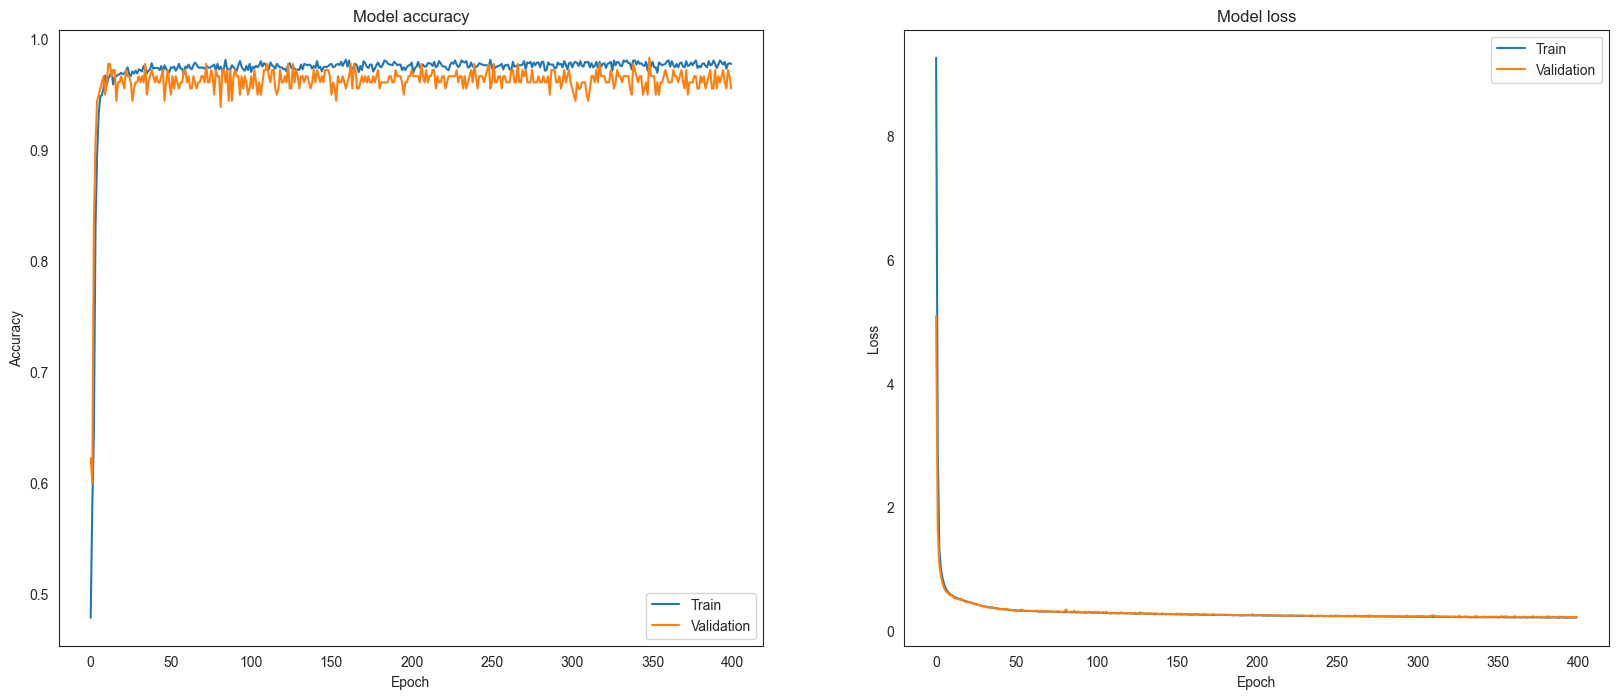

In [38]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Accuracy
axs[0].plot(history.history['accuracy'])
axs[0].plot(history.history['val_accuracy'])
axs[0].set_title('Model accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].legend(['Train', 'Validation'])

# Loss
axs[1].plot(history.history['loss']) 
axs[1].plot(history.history['val_loss']) 
axs[1].set_title('Model loss') 
axs[1].set_ylabel('Loss') 
axs[1].set_xlabel('Epoch') 
axs[1].legend(['Train', 'Validation']) 

plt.show()

In [39]:
# Batch Normalization without regularizer
model = tf.keras.models.Sequential([
    Dense(64, input_dim=20, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(0.01)),
    tf.keras.layers.BatchNormalization(),
    Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(0.01)),
    tf.keras.layers.BatchNormalization(),
    Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(0.01)),
    tf.keras.layers.BatchNormalization(),
    Dense(4, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
earlyStoppingCallback = EarlyStopping(patience=50)

history = model.fit(x_train, y_train, epochs=400, batch_size=16, validation_split=0.1, callbacks=[earlyStoppingCallback], verbose=0)

model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 5ms/step - loss: 0.2317 - accuracy: 0.9600


[0.23167423903942108, 0.9599999785423279]

In [41]:
model = tf.keras.models.Sequential([
    Dense(64, input_dim=20, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(0.01)),
    tf.keras.layers.Dropout(0.3),
    Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(0.01)),
    tf.keras.layers.Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.L1(0.01)),
    tf.keras.layers.Dropout(0.3),
    Dense(4, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [42]:
earlyStoppingCallback = EarlyStopping(patience=50)

history = model.fit(x_train, y_train, epochs=400, batch_size=16, validation_split=0.1, callbacks=[earlyStoppingCallback], verbose=0)

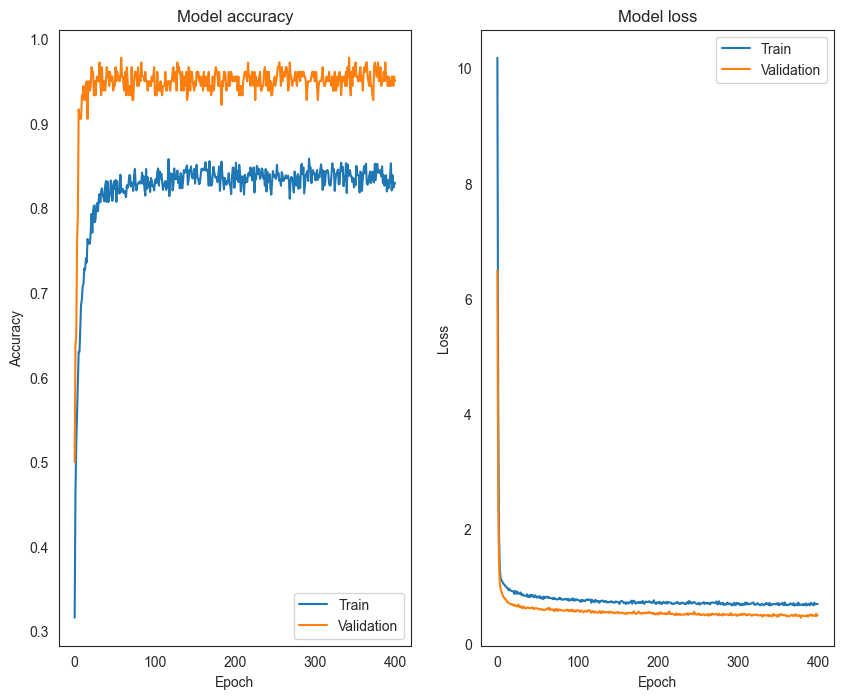

In [43]:
fig, axs = plt.subplots(1, 2, figsize=(10, 8))

# Accuracy
axs[0].plot(history.history['accuracy'])
axs[0].plot(history.history['val_accuracy'])
axs[0].set_title('Model accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].legend(['Train', 'Validation'])

# Loss
axs[1].plot(history.history['loss']) 
axs[1].plot(history.history['val_loss']) 
axs[1].set_title('Model loss') 
axs[1].set_ylabel('Loss') 
axs[1].set_xlabel('Epoch') 
axs[1].legend(['Train', 'Validation']) 

plt.show()

In [44]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.4564 - accuracy: 0.9750


[0.4563690423965454, 0.9750000238418579]

In [45]:
y_predict = L1L2_model.predict(x_test)

predictions = list()
for i in range(len(y_predict)):
    predictions.append(np.argmax(y_predict[i]))

test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

7/7 [==============================] - 0s 2ms/step


In [46]:
from sklearn.metrics import classification_report
print(classification_report(test, predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        72
           1       0.95      0.97      0.96        39
           2       1.00      0.95      0.97        39
           3       1.00      1.00      1.00        50

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.99      0.98      0.98       200



In [47]:
y_predict = L1L2_model.predict(x_predict)

32/32 [==============================] - 0s 3ms/step


In [48]:
predictions = []

for i in range(len(y_predict)):
    predictions.append(np.argmax(y_predict[i]))

predictions[0:10]

[3, 3, 2, 3, 1, 3, 3, 1, 3, 0]